In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# prompt: load a temporal network from email-Eu-core-temporal.txt to networkx

# Assuming the file is in the current directory
with open('email-Eu-core-temporal.txt', 'r') as f:
  edges = []
  for line in f:
    source, target, timestamp = map(int, line.strip().split())
    edges.append((source, target, {'timestamp': timestamp}))

graph = nx.Graph()
graph.add_edges_from(edges)


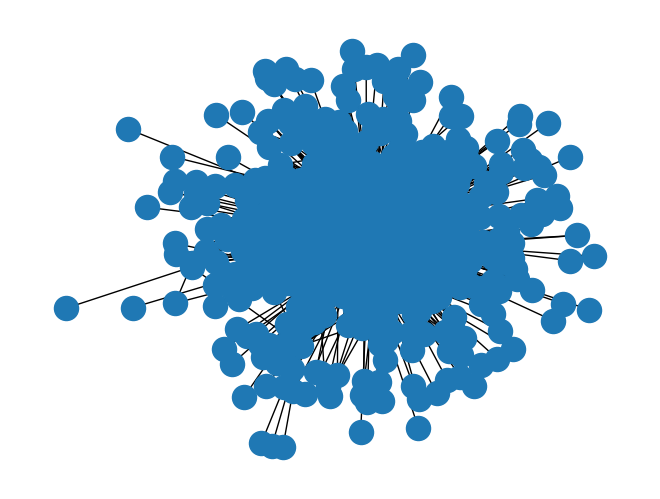

In [ ]:
nx.draw(graph)

In [ ]:
dt = []
for n in graph.nodes():
  times = []
  for e in graph.edges(n,data=True):
    times.append(e[2]['timestamp'])

In [ ]:
tmax = max(times)

## Task 1
 1. Plot the distribution of the interevent times
   * For each node sort its events by the timestamp
   *  For each node iterate through its events in the order of increasing timestamp
   * Save the time elaspsed up to the next event in a new array
   * Collect the data in one single array for all users
2. The best is if you plot the interevent time distribution in a log-log diagram

In [ ]:
n = 0
queue = [[n,0]]
visited = np.ones(max(graph.nodes()) + 1,dtype=int) * (tmax + 1)
visited[n] = 0
while len(queue):
  n,t = queue.pop()
  if visited[n] < t:
    continue
  for e in graph.edges(n,data=True):
    te = e[2]['timestamp']
    if te < t:
      continue
    if visited[e[1]] > te:
      visited[e[1]] = te
      queue.append([e[1],te])
  queue.sort(key=lambda x: x[1])



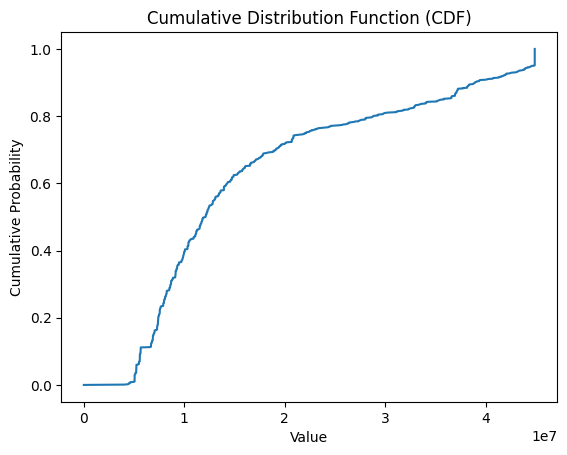

In [ ]:
sorted_visited = np.sort(visited)
yvals = np.arange(len(sorted_visited)) / float(len(sorted_visited) - 1)

# Plot the cumulative distribution
plt.plot(sorted_visited, yvals)
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

Task 2
 1. Study the effect of the following shufflings:
   (a) Shuffle the timestamps: randomly redistribute the existing timestemps among the edges

   (b) Random timestamps: regenerate the timestamps using independent random numbers

   (c) Shuffle the links: a link is composed of (node1, node2) Randomly reshuffle the node2 in each event